# Plotting the Individual Features in HIGGS Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the CSV file
DIR = 'C:\\Programming\\Mafijski Praktikum\\#12 - Higgs\\'
data_path = DIR+'higgs\\HIGGS.csv.gz'
df = pd.read_csv(data_path, compression='gzip', header=None)

In [3]:
# Display the first few rows of the dataframe
print(df.head())

    0         1         2         3         4         5         6         7   \
0  1.0  0.869293 -0.635082  0.225690  0.327470 -0.689993  0.754202 -0.248573   
1  1.0  0.907542  0.329147  0.359412  1.497970 -0.313010  1.095531 -0.557525   
2  1.0  0.798835  1.470639 -1.635975  0.453773  0.425629  1.104875  1.282322   
3  0.0  1.344385 -0.876626  0.935913  1.992050  0.882454  1.786066 -1.646778   
4  1.0  1.105009  0.321356  1.522401  0.882808 -1.205349  0.681466 -1.070464   

         8         9   ...        19        20        21        22        23  \
0 -1.092064  0.000000  ... -0.010455 -0.045767  3.101961  1.353760  0.979563   
1 -1.588230  2.173076  ... -1.138930 -0.000819  0.000000  0.302220  0.833048   
2  1.381664  0.000000  ...  1.128848  0.900461  0.000000  0.909753  1.108330   
3 -0.942383  0.000000  ... -0.678379 -1.360356  0.000000  0.946652  1.028704   
4 -0.921871  0.000000  ... -0.373566  0.113041  0.000000  0.755856  1.361057   

         24        25        26       

The first column is the class label (1 for signal, 0 for background), followed by the 28 features (21 low-level features then 7 high-level features): lepton  pT, lepton  eta, lepton  phi, missing energy magnitude, missing energy phi, jet 1 pt, jet 1 eta, jet 1 phi, jet 1 b-tag, jet 2 pt, jet 2 eta, jet 2 phi, jet 2 b-tag, jet 3 pt, jet 3 eta, jet 3 phi, jet 3 b-tag, jet 4 pt, jet 4 eta, jet 4 phi, jet 4 b-tag, m_jj, m_jjj, m_lv, m_jlv, m_bb, m_wbb, m_wwbb. 


In [4]:
# Define the features dictionary
features = {
    1: [r'lepton $p_{T}^{\ell}$', 0],
    2: [r'lepton $\eta_{\ell}$', 0],
    3: [r'lepton $\phi$', 1],
    4: [r'missing energy $E_{\nu}^{miss}$', 0],
    5: [r'missing energy phi $\phi^{miss}$', 1],
    6: [r'jet 1 $p_{T}$', 0],
    7: [r'jet 1 $\eta$', 0],
    8: [r'jet 1 $\phi$', 1],
    9: [r'jet 1 $b$-tag', 2],
    10: [r'jet 2 $p_{T}$', 0],
    11: [r'jet 2 $\eta$', 0],
    12: [r'jet 2 $\phi$', 1],
    13: [r'jet 2 $b$-tag', 2],
    14: [r'jet 3 $p_{T}$', 0],
    15: [r'jet 3 $\eta$', 0],
    16: [r'jet 3 $\phi$', 1],
    17: [r'jet 3 $b$-tag', 2],
    18: [r'jet 3 $p_{T}$', 0],
    19: [r'jet 3 $\eta$', 0],
    20: [r'jet 3 $\phi$', 1],
    21: [r'jet 3 $b$-tag', 2],
    22: [r'$m_{jj}$', 0],
    23: [r'$m_{jjj}$', 0],
    24: [r'$m_{\ell\nu}$', 0],
    25: [r'$m_{j\ell\nu}$', 0],
    26: [r'$m_{bb}$', 0],
    27: [r'$m_{W\,bb}$', 0],
    28: [r'$m_{WW\,bb}$', 0]
}

# Split the features into continuous, uniform, and discrete
continuous_features = [key for key, value in features.items() if value[1] == 0]
uniform_features = [key for key, value in features.items() if value[1] == 1]
discrete_features = [key for key, value in features.items() if value[1] == 2]

In [5]:
FeaturesDict = {
    'class_label': np.float32,
    'jet_1_b-tag': np.float64,
    'jet_1_eta': np.float64,
    'jet_1_phi': np.float64,
    'jet_1_pt': np.float64,
    'jet_2_b-tag': np.float64,
    'jet_2_eta': np.float64,
    'jet_2_phi': np.float64,
    'jet_2_pt': np.float64,
    'jet_3_b-tag': np.float64,
    'jet_3_eta': np.float64,
    'jet_3_phi': np.float64,
    'jet_3_pt': np.float64,
    'jet_4_b-tag': np.float64,
    'jet_4_eta': np.float64,
    'jet_4_phi': np.float64,
    'jet_4_pt': np.float64,
    'lepton_eta': np.float64,
    'lepton_pT': np.float64,
    'lepton_phi': np.float64,
    'm_bb': np.float64,
    'm_jj': np.float64,
    'm_jjj': np.float64,
    'm_jlv': np.float64,
    'm_lv': np.float64,
    'm_wbb': np.float64,
    'm_wwbb': np.float64,
    'missing_energy_magnitude': np.float64,
    'missing_energy_phi': np.float64,
}

In [6]:
# Function to plot histograms for continuous features
def plot_histograms(df):
    continuous_features = df.columns[1:19]  # The 18 continuous features (excluding the label)

    fig, axs = plt.subplots(3, 3, figsize=(15, 15))
    axs = axs.ravel()

    for i, col in enumerate(continuous_features):
        # Plot signal and background
        axs[i].hist(df[df[0] == 1][col], bins=50, density=True, histtype='step', color='red', alpha=0.7, linewidth=1.5, label='Signal')
        axs[i].hist(df[df[0] == 0][col], bins=50, density=True, histtype='step', color='blue', alpha=0.7, linewidth=1.5, label='Background')
        axs[i].set_title(f'Feature {col}')
        axs[i].legend()

    plt.tight_layout()
    plt.show()

# Function to plot histograms for discrete and uniform features
def plot_discrete_uniform_histograms(df):
    discrete_uniform_features = df.columns[19:]  # The remaining features

    fig, axs = plt.subplots(3, 3, figsize=(15, 15))
    axs = axs.ravel()

    for i, col in enumerate(discrete_uniform_features):
        # Plot signal and background
        axs[i].hist(df[df[0] == 1][col], bins=50, density=True, histtype='step', color='red', alpha=0.7, linewidth=1.5, label='Signal')
        axs[i].hist(df[df[0] == 0][col], bins=50, density=True, histtype='step', color='blue', alpha=0.7, linewidth=1.5, label='Background')
        axs[i].set_title(f'Feature {col}')
        axs[i].legend()
    
    plt.tight_layout()
    plt.show()

"""
Don't use these ones
"""

"\nDon't use these ones\n"

In [7]:
# Function to plot histograms for given features
def plot_histograms(df, features, title):
    num_features = len(features)
    num_plots = 3 if num_features % 3 == 0 else num_features % 3
    fig, axs = plt.subplots(num_plots, 3, figsize=(15, 5 * num_plots))
    axs = axs.ravel()
    
    for i, col in enumerate(features):
        feature_name = features[col][0]
        axs[i].hist(df[df[0] == 1][col], bins=50, density=True, histtype='step', color='red', alpha=0.7, linewidth=1.5, label='Signal')
        axs[i].hist(df[df[0] == 0][col], bins=50, density=True, histtype='step', color='blue', alpha=0.7, linewidth=1.5, label='Background')
        axs[i].set_xlabel(feature_name)
        axs[i].legend()

    for j in range(i + 1, num_plots * 3):
        fig.delaxes(axs[j])
    
    plt.tight_layout()
    plt.suptitle(title)
    plt.subplots_adjust(top=0.95)
    plt.show()

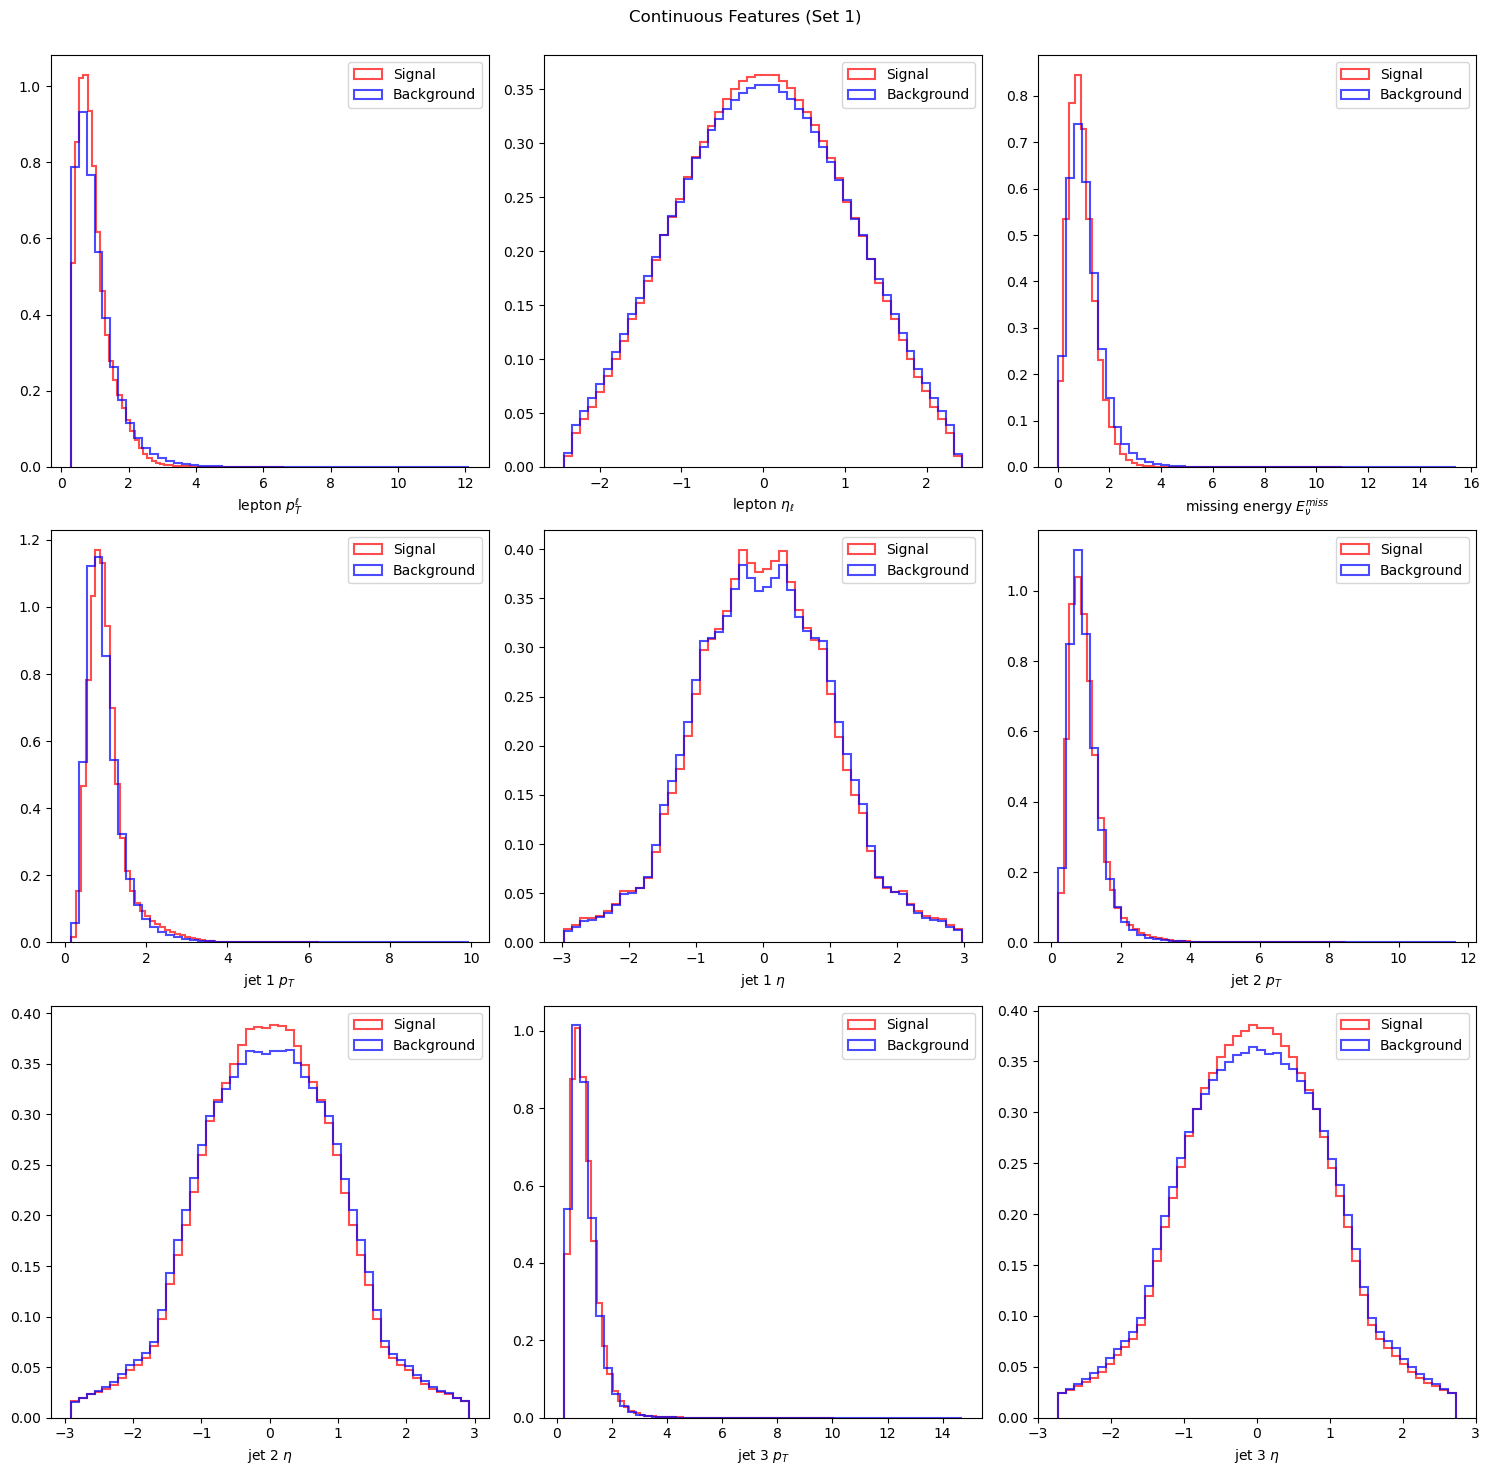

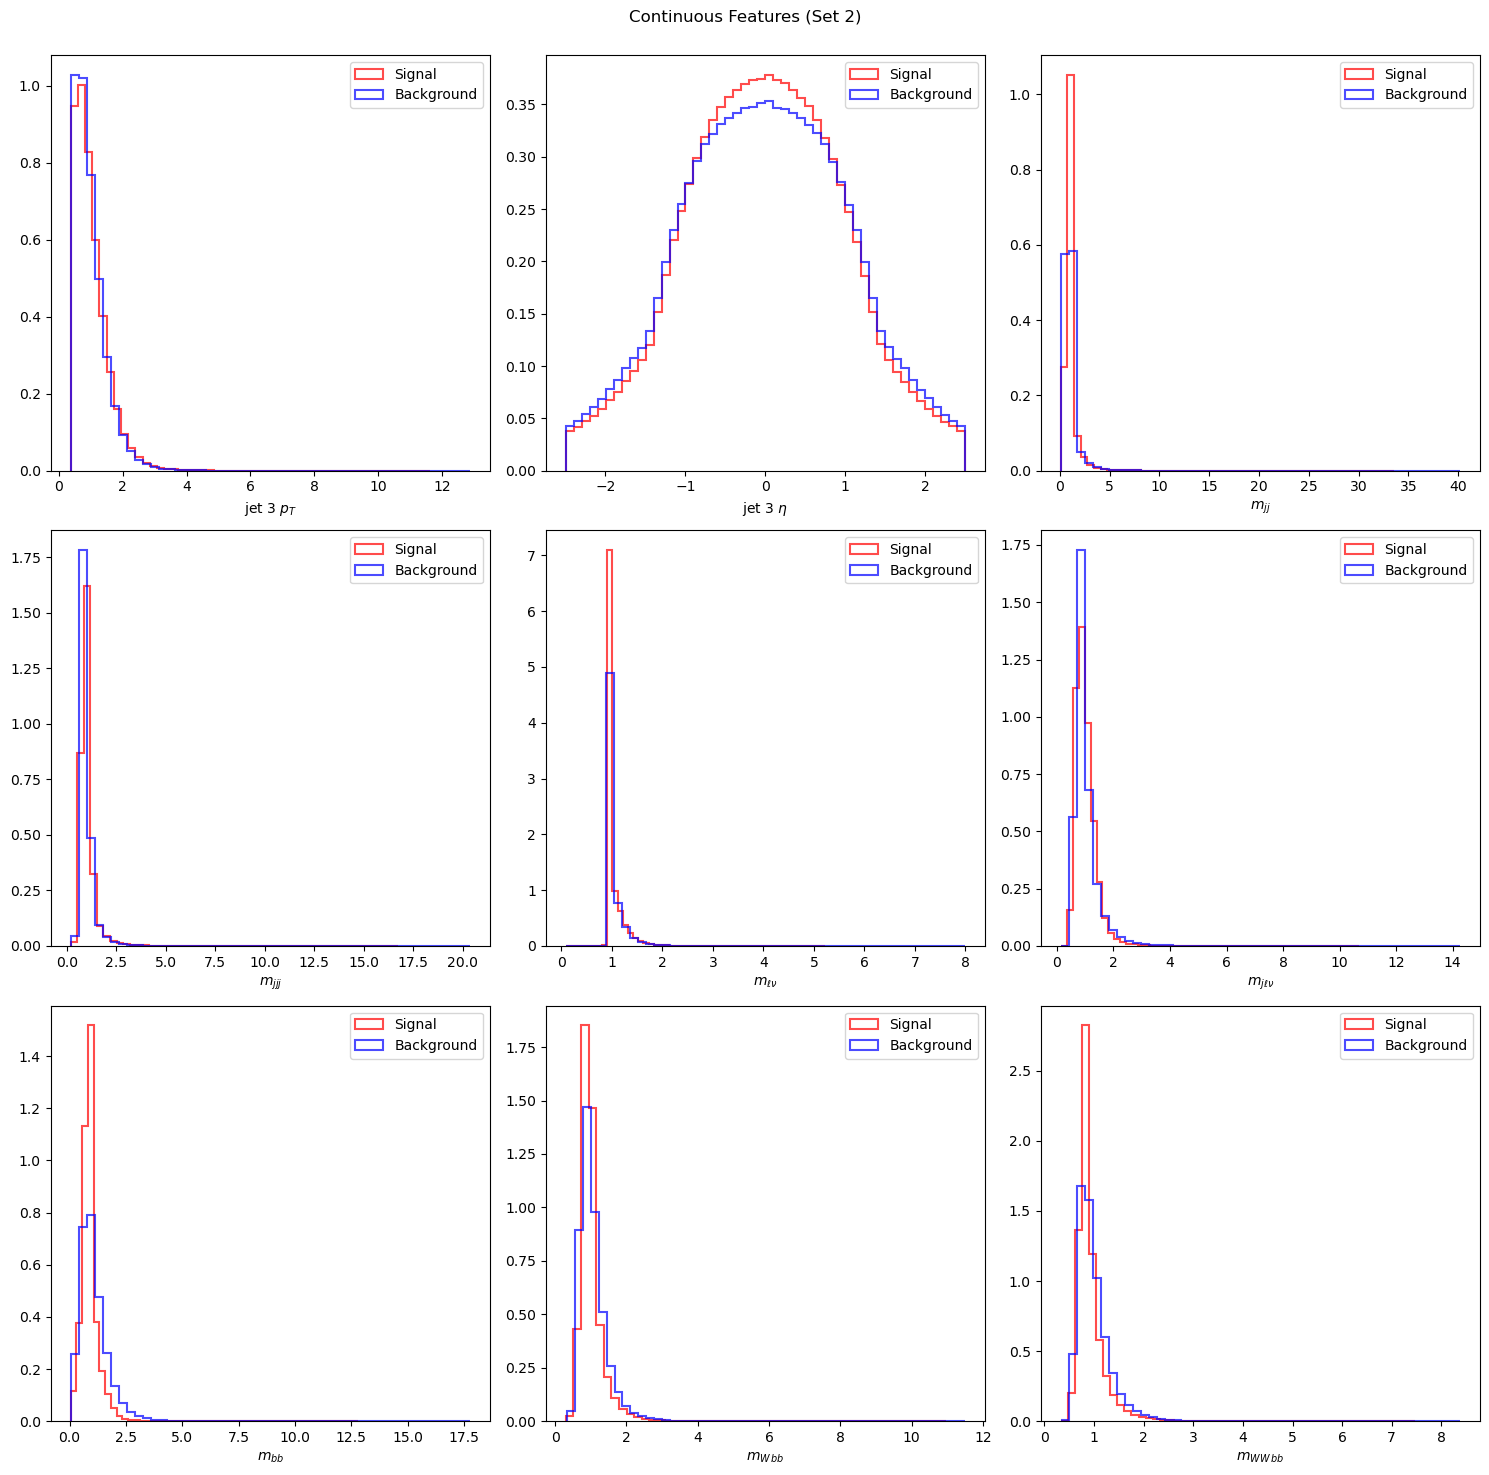

In [8]:
# Plot continuous features (split into two sets)
plot_histograms(df, {k: features[k] for k in continuous_features[:9]}, "Continuous Features (Set 1)")
plot_histograms(df, {k: features[k] for k in continuous_features[9:]}, "Continuous Features (Set 2)")

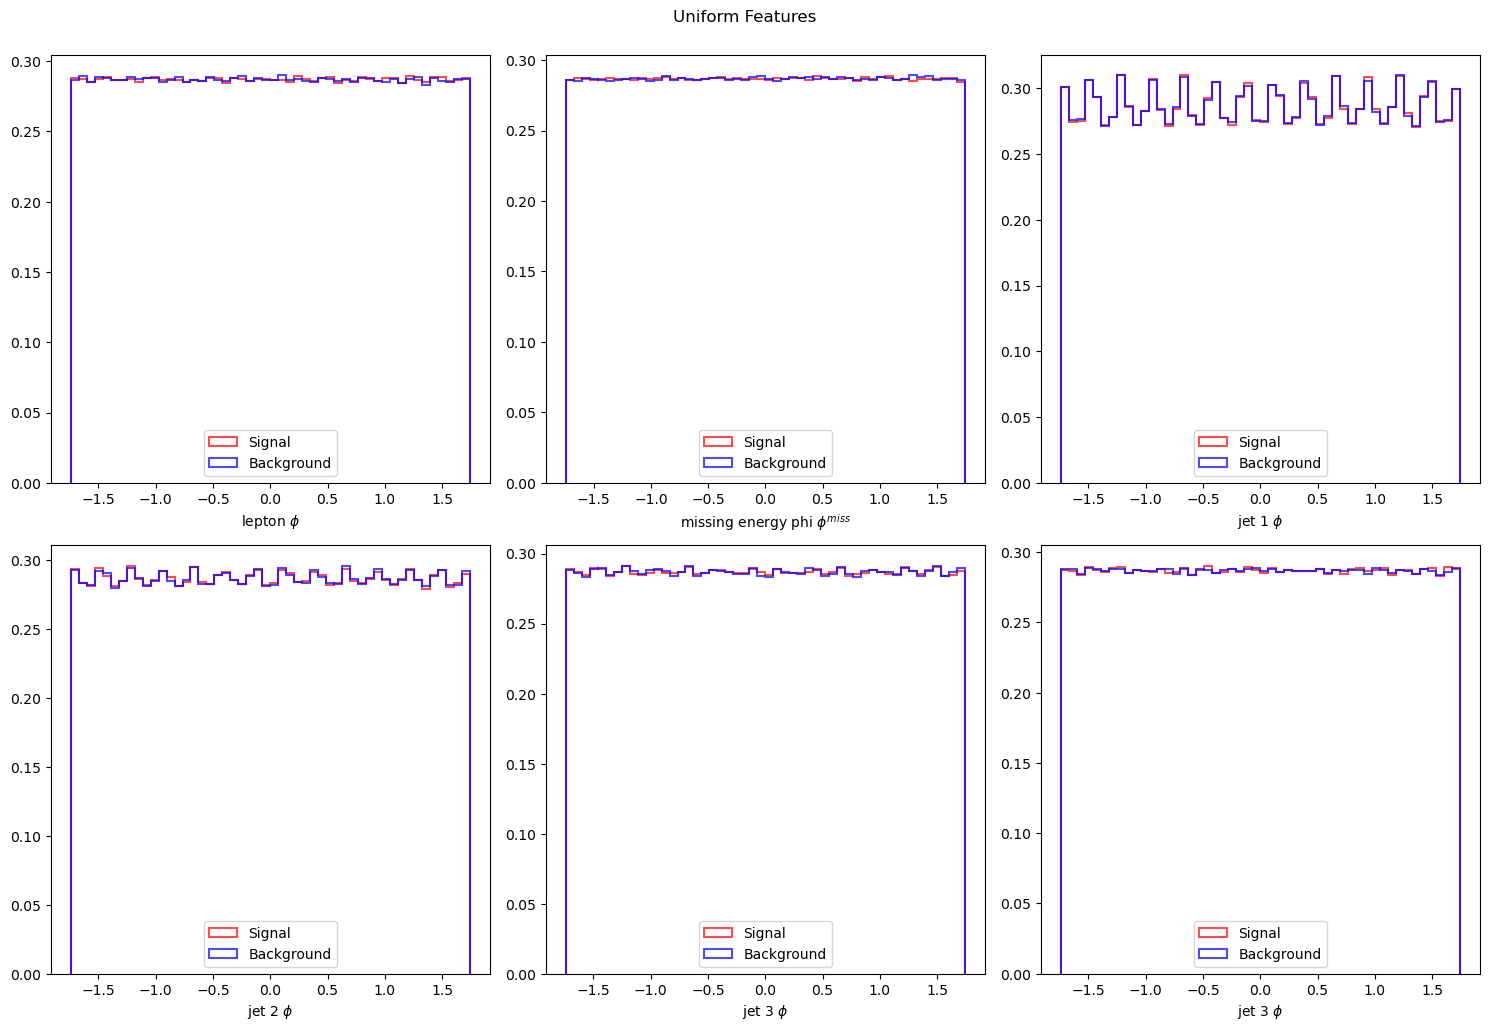

In [9]:
# Plot uniform features
plot_histograms(df, {k: features[k] for k in uniform_features}, "Uniform Features")

IndexError: index 3 is out of bounds for axis 0 with size 3

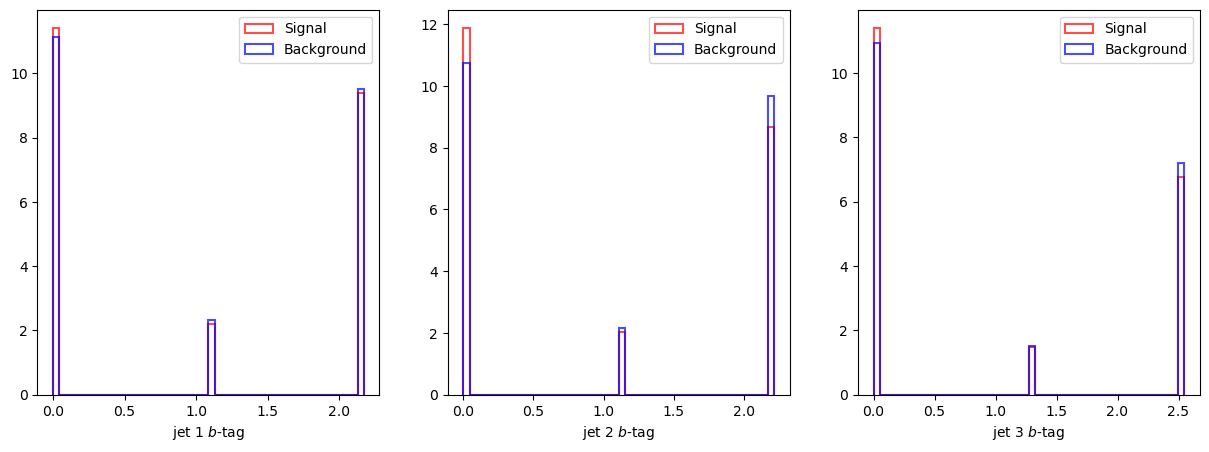

In [10]:
# Plot discrete features
plot_histograms(df, {k: features[k] for k in discrete_features}, "Discrete Features")

In [11]:
import os

# Create the directory if it doesn't exist
output_dir = "HiggsDatasetImages"
os.makedirs(output_dir, exist_ok=True)

def plot_and_save_histograms(df, features, output_dir):
    for col, (feature_name, _) in features.items():
        fig, axs = plt.subplots(1, 2, figsize=(15, 5))
        
        # Plot for signal
        axs[0].hist(df[df[0] == 1][col], bins=50, density=True, histtype='step', color='red', alpha=0.7, linewidth=1.5)
        axs[0].set_xlabel(feature_name)
        axs[0].set_ylabel('Density')
        axs[0].set_title(f'Signal - {feature_name}')
        
        # Plot for background
        axs[1].hist(df[df[0] == 0][col], bins=50, density=True, histtype='step', color='blue', alpha=0.7, linewidth=1.5)
        axs[1].set_xlabel(feature_name)
        axs[1].set_ylabel('Density')
        axs[1].set_title(f'Background - {feature_name}')
        
        # Save the figure in high quality
        output_path = os.path.join(output_dir, f'{col:02d}_{feature_name.replace("$", "").replace("\\", "").replace(" ", "_")}.pdf')
        fig.tight_layout()
        fig.savefig(output_path, format='pdf')
        plt.close(fig)

In [12]:
# Plot and save histograms
plot_and_save_histograms(df, features, output_dir)